# Exponentially Weighted Moving Average

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance 
from pandas_datareader import data as wb
yfinance.pdr_override()

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
ihsg = wb.get_data_yahoo('^JKSE', start = '2008-01-01', end = '2023-03-31')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [26]:
ihsg.head(20)

,Close
Date,
2008-01-02,2731.507080
2008-01-03,2715.064941
2008-01-04,2765.189941
2008-01-07,2776.409912
2008-01-08,2785.625000
2008-01-09,2830.262939
2008-01-14,2810.372070
2008-01-15,2730.031006
2008-01-16,2592.311035


## Calculating Simple Moving Average

In [27]:
ihsg.head(10).rolling(window = 5).mean()

,Close
Date,
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,2754.759375
2008-01-09,2774.510547
2008-01-14,2793.571973
2008-01-15,2786.540186
2008-01-16,2749.720410


## Calculating Exponential Moving Average

In [28]:
ihsg.head(10).ewm(span = 5, min_periods=5).mean()

,Close
Date,
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,2767.650569
2008-01-09,2790.529976
2008-01-14,2797.555176
2008-01-15,2774.133232
2008-01-16,2711.907191


## Adding New Columns of EMA & SMA

In [33]:
ihsg['SMA'] = ihsg['Close'].rolling(window = 50).mean()
ihsg['EMA'] = ihsg['Close'].ewm(span = 50, min_periods = 50 ).mean()

## Plotting SMA Vs EMA 

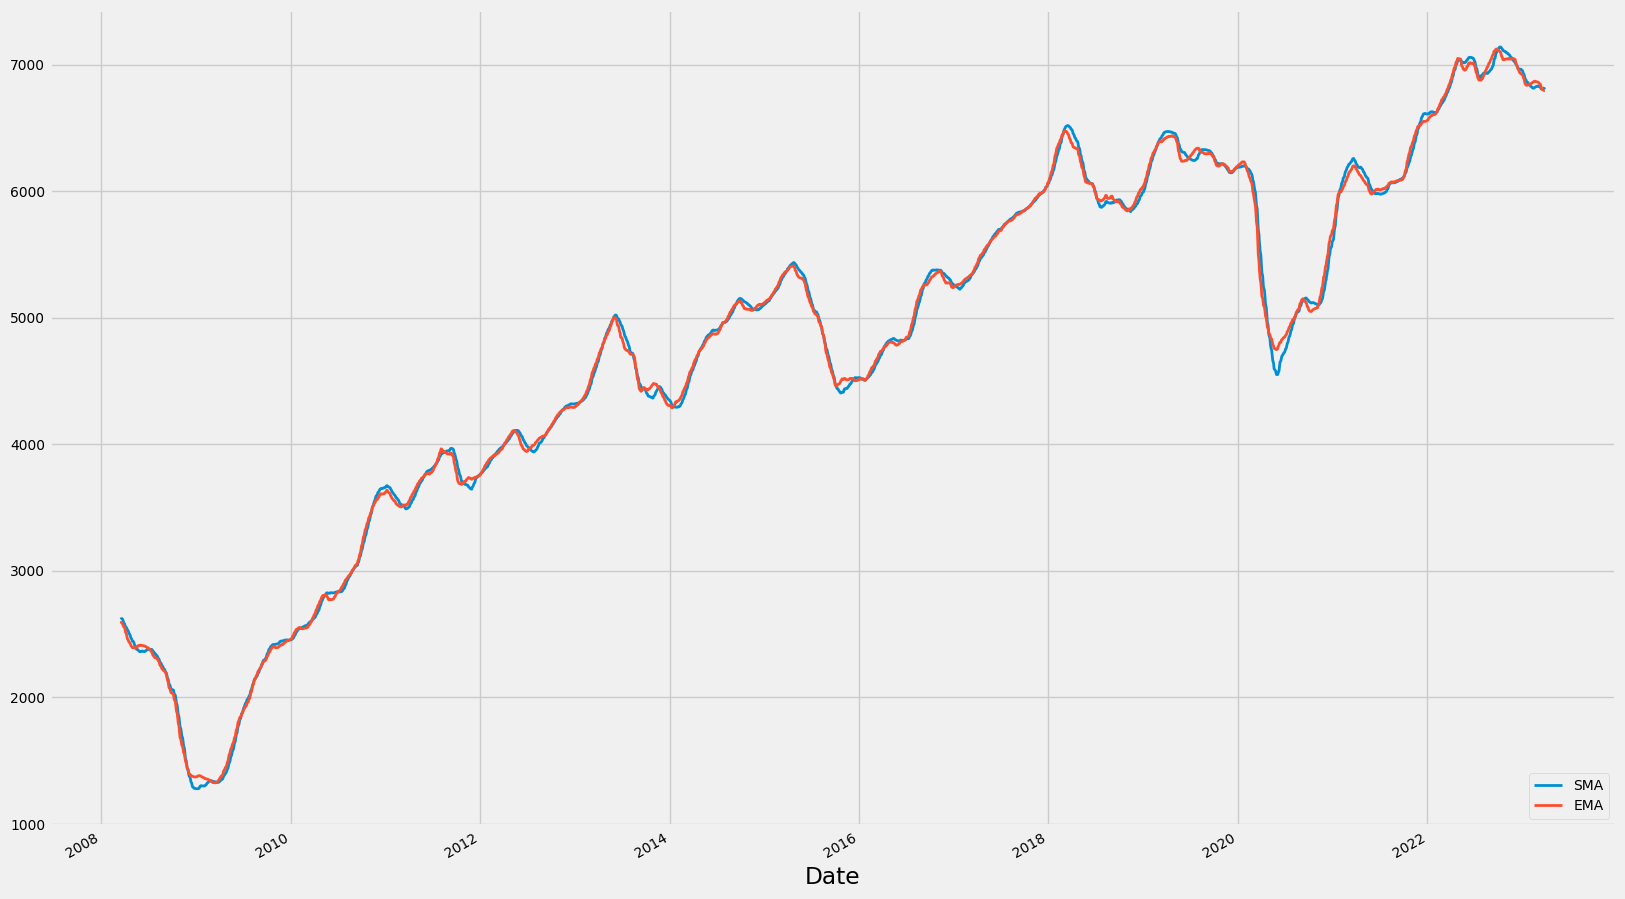

In [49]:
plt.style.use('fivethirtyeight')
ihsg.iloc[:, 1:].plot(figsize = (18,12), fontsize = 10, linewidth = 2)
plt.legend(loc = 'lower right', fontsize = 10)
plt.show()